In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        notebook=True, early_stop=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        scheduler, model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, 
                                            early_stop=early_stop)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb28c22bdd8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb28c22b780>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb28c22b7f0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser
from mlp.schedulers import *

adam l2 vs adam weight decay

Epoch 1: 10.6s to complete
    error(train)=6.44e-01, acc(train)=7.95e-01, error(valid)=6.75e-01, acc(valid)=7.87e-01


Epoch 2: 10.0s to complete
    error(train)=5.54e-01, acc(train)=8.18e-01, error(valid)=6.05e-01, acc(valid)=8.03e-01


Epoch 3: 10.1s to complete
    error(train)=4.87e-01, acc(train)=8.35e-01, error(valid)=5.58e-01, acc(valid)=8.18e-01


Epoch 4: 9.6s to complete
    error(train)=4.65e-01, acc(train)=8.41e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


Epoch 5: 9.9s to complete
    error(train)=4.34e-01, acc(train)=8.48e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


Epoch 6: 9.3s to complete
    error(train)=3.90e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 7: 10.2s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 8: 8.0s to complete
    error(train)=3.84e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.25e-01


Epoch 9: 10.0s to complete
    error(train)=3.56e-01, acc(train)=8.71e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 10: 8.9s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 11: 12.9s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 12: 9.5s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 13: 10.3s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 14: 22.1s to complete
    error(train)=3.07e-01, acc(train)=8.86e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


Epoch 15: 24.8s to complete
    error(train)=2.99e-01, acc(train)=8.89e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01


Epoch 16: 20.8s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 17: 17.7s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 18: 17.8s to complete
    error(train)=2.81e-01, acc(train)=8.94e-01, error(valid)=5.46e-01, acc(valid)=8.32e-01


Epoch 19: 19.1s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


Epoch 20: 20.2s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=5.48e-01, acc(valid)=8.36e-01


Epoch 21: 20.5s to complete
    error(train)=2.58e-01, acc(train)=9.02e-01, error(valid)=5.56e-01, acc(valid)=8.32e-01


Epoch 22: 18.0s to complete
    error(train)=2.54e-01, acc(train)=9.02e-01, error(valid)=5.70e-01, acc(valid)=8.36e-01


Epoch 23: 18.6s to complete
    error(train)=2.59e-01, acc(train)=9.01e-01, error(valid)=5.86e-01, acc(valid)=8.32e-01


Epoch 24: 19.0s to complete
    error(train)=2.58e-01, acc(train)=9.02e-01, error(valid)=5.92e-01, acc(valid)=8.30e-01


Epoch 25: 19.3s to complete
    error(train)=2.49e-01, acc(train)=9.03e-01, error(valid)=5.99e-01, acc(valid)=8.32e-01


Epoch 26: 18.4s to complete
    error(train)=2.41e-01, acc(train)=9.04e-01, error(valid)=5.95e-01, acc(valid)=8.30e-01


Epoch 27: 18.7s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=5.82e-01, acc(valid)=8.36e-01


Epoch 28: 18.0s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=6.09e-01, acc(valid)=8.31e-01


Epoch 29: 18.1s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=6.00e-01, acc(valid)=8.35e-01


Epoch 30: 18.8s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=6.34e-01, acc(valid)=8.33e-01


Epoch 31: 20.3s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=6.21e-01, acc(valid)=8.31e-01


Epoch 32: 19.1s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=6.50e-01, acc(valid)=8.31e-01


Epoch 33: 18.4s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.48e-01, acc(valid)=8.31e-01


Epoch 34: 17.3s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.58e-01, acc(valid)=8.29e-01


Epoch 35: 18.4s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.56e-01, acc(valid)=8.28e-01


Epoch 36: 18.0s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.73e-01, acc(valid)=8.25e-01


Epoch 37: 19.6s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.77e-01, acc(valid)=8.31e-01


Epoch 38: 18.5s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.85e-01, acc(valid)=8.30e-01


Epoch 39: 18.1s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=7.04e-01, acc(valid)=8.29e-01


Epoch 40: 17.9s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=6.92e-01, acc(valid)=8.28e-01


Epoch 41: 19.0s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=7.23e-01, acc(valid)=8.24e-01


Epoch 42: 20.9s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=7.29e-01, acc(valid)=8.25e-01


Epoch 43: 18.7s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=7.45e-01, acc(valid)=8.26e-01


Epoch 44: 18.0s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=7.61e-01, acc(valid)=8.24e-01


Epoch 45: 22.8s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.41e-01, acc(valid)=8.25e-01


Epoch 46: 18.6s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.56e-01, acc(valid)=8.28e-01


Epoch 47: 18.2s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=7.61e-01, acc(valid)=8.23e-01


Epoch 48: 20.9s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.73e-01, acc(valid)=8.23e-01


Epoch 49: 18.6s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=7.73e-01, acc(valid)=8.24e-01


Epoch 50: 18.3s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=7.85e-01, acc(valid)=8.24e-01


Epoch 51: 19.8s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.09e-01, acc(valid)=8.26e-01


Epoch 52: 19.9s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=8.03e-01, acc(valid)=8.25e-01


Epoch 53: 18.8s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=8.57e-01, acc(valid)=8.20e-01


Epoch 54: 18.2s to complete
    error(train)=1.79e-01, acc(train)=9.25e-01, error(valid)=8.42e-01, acc(valid)=8.20e-01


Epoch 55: 18.6s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=8.46e-01, acc(valid)=8.21e-01


Epoch 56: 18.1s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=8.56e-01, acc(valid)=8.22e-01


Epoch 57: 18.8s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=8.59e-01, acc(valid)=8.23e-01


Epoch 58: 17.7s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.69e-01, acc(valid)=8.19e-01


Epoch 59: 19.8s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=8.78e-01, acc(valid)=8.23e-01


Epoch 60: 10.8s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.64e-01, acc(valid)=8.23e-01


Epoch 61: 7.6s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=8.81e-01, acc(valid)=8.19e-01


Epoch 62: 8.5s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=8.96e-01, acc(valid)=8.24e-01


Epoch 63: 8.1s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=9.08e-01, acc(valid)=8.19e-01


Epoch 64: 7.7s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=9.19e-01, acc(valid)=8.20e-01


Epoch 65: 8.0s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=9.33e-01, acc(valid)=8.19e-01


Epoch 66: 8.6s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=9.31e-01, acc(valid)=8.24e-01


Epoch 67: 7.7s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=9.64e-01, acc(valid)=8.22e-01


Epoch 68: 8.6s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=9.34e-01, acc(valid)=8.22e-01


Epoch 69: 7.8s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=9.64e-01, acc(valid)=8.19e-01


Epoch 70: 12.6s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=9.67e-01, acc(valid)=8.17e-01


Epoch 71: 10.2s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=9.98e-01, acc(valid)=8.21e-01


Epoch 72: 10.7s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=9.98e-01, acc(valid)=8.16e-01


Epoch 73: 10.6s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=9.79e-01, acc(valid)=8.19e-01


Epoch 74: 8.3s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=1.00e+00, acc(valid)=8.16e-01


Epoch 75: 7.7s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=1.00e+00, acc(valid)=8.21e-01


Epoch 76: 8.7s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


Epoch 77: 8.9s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=1.02e+00, acc(valid)=8.19e-01


Epoch 78: 9.7s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=1.04e+00, acc(valid)=8.15e-01


Epoch 79: 8.7s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.02e+00, acc(valid)=8.17e-01


Epoch 80: 8.9s to complete
    error(train)=1.50e-01, acc(train)=9.36e-01, error(valid)=1.06e+00, acc(valid)=8.15e-01


Epoch 81: 11.0s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=1.02e+00, acc(valid)=8.23e-01


Epoch 82: 8.3s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=1.04e+00, acc(valid)=8.15e-01


Epoch 83: 8.7s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


Epoch 84: 9.7s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.08e+00, acc(valid)=8.19e-01


Epoch 85: 10.1s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=1.09e+00, acc(valid)=8.14e-01


Epoch 86: 8.7s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=1.07e+00, acc(valid)=8.17e-01


Epoch 87: 7.9s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=1.09e+00, acc(valid)=8.19e-01


Epoch 88: 9.5s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=1.09e+00, acc(valid)=8.18e-01


Epoch 89: 10.9s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.10e+00, acc(valid)=8.14e-01


Epoch 90: 8.1s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.11e+00, acc(valid)=8.17e-01


Epoch 91: 8.9s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.10e+00, acc(valid)=8.20e-01


Epoch 92: 7.9s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.13e+00, acc(valid)=8.17e-01


Epoch 93: 9.0s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=1.10e+00, acc(valid)=8.19e-01


Epoch 94: 7.9s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.11e+00, acc(valid)=8.19e-01


Epoch 95: 8.7s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.12e+00, acc(valid)=8.17e-01


Epoch 96: 8.7s to complete
    error(train)=1.46e-01, acc(train)=9.40e-01, error(valid)=1.15e+00, acc(valid)=8.17e-01


Epoch 97: 13.5s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


Epoch 98: 18.9s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.17e+00, acc(valid)=8.17e-01


Epoch 99: 18.7s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.16e+00, acc(valid)=8.17e-01


Epoch 100: 17.8s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=1.16e+00, acc(valid)=8.16e-01


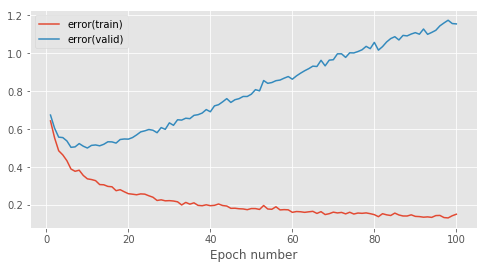

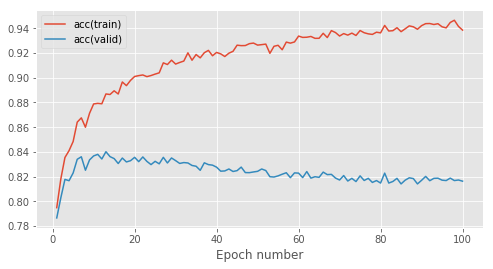

In [4]:
# adam l2 constant
run_times = 1
learning_rate = 1e-3
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRuleWithL2()
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

sum_stats = np.sum(five_stats,axis=0)
stats_adaml2_constant = sum_stats/run_times

Epoch 1: 9.6s to complete
    error(train)=6.85e-01, acc(train)=7.81e-01, error(valid)=7.24e-01, acc(valid)=7.74e-01


Epoch 2: 9.0s to complete
    error(train)=5.62e-01, acc(train)=8.13e-01, error(valid)=6.13e-01, acc(valid)=8.01e-01


Epoch 3: 9.4s to complete
    error(train)=4.99e-01, acc(train)=8.29e-01, error(valid)=5.69e-01, acc(valid)=8.09e-01


Epoch 4: 9.3s to complete
    error(train)=4.77e-01, acc(train)=8.36e-01, error(valid)=5.59e-01, acc(valid)=8.12e-01


Epoch 5: 9.0s to complete
    error(train)=4.30e-01, acc(train)=8.52e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


Epoch 6: 7.9s to complete
    error(train)=4.10e-01, acc(train)=8.55e-01, error(valid)=5.18e-01, acc(valid)=8.26e-01


Epoch 7: 10.3s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


Epoch 8: 10.4s to complete
    error(train)=3.70e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


Epoch 9: 8.7s to complete
    error(train)=3.69e-01, acc(train)=8.66e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 10: 4.4s to complete
    error(train)=3.57e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 11: 4.4s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 12: 3.9s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 13: 3.8s to complete
    error(train)=3.17e-01, acc(train)=8.84e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 14: 5.9s to complete
    error(train)=3.06e-01, acc(train)=8.88e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


Epoch 15: 5.4s to complete
    error(train)=3.13e-01, acc(train)=8.83e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 16: 4.6s to complete
    error(train)=2.95e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 17: 4.8s to complete
    error(train)=2.91e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


Epoch 18: 4.5s to complete
    error(train)=3.05e-01, acc(train)=8.85e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


Epoch 19: 5.1s to complete
    error(train)=2.76e-01, acc(train)=8.95e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01


Epoch 20: 5.3s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=5.39e-01, acc(valid)=8.33e-01


Epoch 21: 4.3s to complete
    error(train)=2.70e-01, acc(train)=8.97e-01, error(valid)=5.42e-01, acc(valid)=8.35e-01


Epoch 22: 4.0s to complete
    error(train)=2.76e-01, acc(train)=8.92e-01, error(valid)=5.56e-01, acc(valid)=8.27e-01


Epoch 23: 3.9s to complete
    error(train)=2.61e-01, acc(train)=8.97e-01, error(valid)=5.49e-01, acc(valid)=8.30e-01


Epoch 24: 3.9s to complete
    error(train)=2.48e-01, acc(train)=9.04e-01, error(valid)=5.51e-01, acc(valid)=8.37e-01


Epoch 25: 3.9s to complete
    error(train)=2.47e-01, acc(train)=9.04e-01, error(valid)=5.47e-01, acc(valid)=8.36e-01


Epoch 26: 4.1s to complete
    error(train)=2.41e-01, acc(train)=9.06e-01, error(valid)=5.58e-01, acc(valid)=8.34e-01


Epoch 27: 4.4s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=5.68e-01, acc(valid)=8.35e-01


Epoch 28: 6.8s to complete
    error(train)=2.45e-01, acc(train)=9.03e-01, error(valid)=5.84e-01, acc(valid)=8.34e-01


Epoch 29: 4.2s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.75e-01, acc(valid)=8.37e-01


Epoch 30: 3.8s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=5.68e-01, acc(valid)=8.40e-01


Epoch 31: 4.5s to complete
    error(train)=2.19e-01, acc(train)=9.12e-01, error(valid)=5.82e-01, acc(valid)=8.36e-01


Epoch 32: 4.7s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=5.96e-01, acc(valid)=8.32e-01


Epoch 33: 4.0s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=6.05e-01, acc(valid)=8.33e-01


Epoch 34: 3.9s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=6.21e-01, acc(valid)=8.30e-01


Epoch 35: 4.2s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.33e-01


Epoch 36: 4.5s to complete
    error(train)=2.02e-01, acc(train)=9.20e-01, error(valid)=6.07e-01, acc(valid)=8.34e-01


Epoch 37: 4.4s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.23e-01, acc(valid)=8.30e-01


Epoch 38: 4.2s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.35e-01, acc(valid)=8.32e-01


Epoch 39: 4.3s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=6.33e-01, acc(valid)=8.30e-01


Epoch 40: 4.6s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=6.20e-01, acc(valid)=8.35e-01


Epoch 41: 4.6s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.39e-01, acc(valid)=8.32e-01


Epoch 42: 4.0s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=6.56e-01, acc(valid)=8.31e-01


Epoch 43: 3.9s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=6.45e-01, acc(valid)=8.33e-01


Epoch 44: 3.9s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.47e-01, acc(valid)=8.32e-01


Epoch 45: 4.0s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=6.86e-01, acc(valid)=8.23e-01


Epoch 46: 3.9s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=6.75e-01, acc(valid)=8.34e-01


Epoch 47: 4.3s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=6.79e-01, acc(valid)=8.29e-01


Epoch 48: 4.2s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=6.61e-01, acc(valid)=8.29e-01


Epoch 49: 4.0s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=6.87e-01, acc(valid)=8.28e-01


Epoch 50: 4.5s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.87e-01, acc(valid)=8.31e-01


Epoch 51: 4.3s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=6.91e-01, acc(valid)=8.28e-01


Epoch 52: 3.9s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=6.98e-01, acc(valid)=8.27e-01


Epoch 53: 3.9s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=6.98e-01, acc(valid)=8.32e-01


Epoch 54: 3.8s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=7.04e-01, acc(valid)=8.28e-01


Epoch 55: 5.6s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=7.18e-01, acc(valid)=8.27e-01


Epoch 56: 3.9s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.08e-01, acc(valid)=8.28e-01


Epoch 57: 4.3s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=7.40e-01, acc(valid)=8.26e-01


Epoch 58: 4.1s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.23e-01, acc(valid)=8.29e-01


Epoch 59: 4.5s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=7.29e-01, acc(valid)=8.26e-01


Epoch 60: 4.4s to complete
    error(train)=1.72e-01, acc(train)=9.27e-01, error(valid)=7.27e-01, acc(valid)=8.28e-01


Epoch 61: 3.9s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=7.22e-01, acc(valid)=8.27e-01


Epoch 62: 3.7s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=7.38e-01, acc(valid)=8.28e-01


Epoch 63: 3.7s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=7.47e-01, acc(valid)=8.28e-01


Epoch 64: 3.7s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=7.46e-01, acc(valid)=8.27e-01


Epoch 65: 3.7s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=7.59e-01, acc(valid)=8.31e-01


Epoch 66: 4.1s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=7.56e-01, acc(valid)=8.25e-01


Epoch 67: 3.7s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=7.73e-01, acc(valid)=8.25e-01


Epoch 68: 3.7s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=7.46e-01, acc(valid)=8.26e-01


Epoch 69: 3.7s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.81e-01, acc(valid)=8.24e-01


Epoch 70: 3.7s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=8.01e-01, acc(valid)=8.21e-01


Epoch 71: 5.1s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=7.87e-01, acc(valid)=8.19e-01


Epoch 72: 5.4s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=7.61e-01, acc(valid)=8.27e-01


Epoch 73: 4.3s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=7.92e-01, acc(valid)=8.27e-01


Epoch 74: 3.7s to complete
    error(train)=1.53e-01, acc(train)=9.39e-01, error(valid)=7.76e-01, acc(valid)=8.29e-01


Epoch 75: 4.2s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.00e-01, acc(valid)=8.27e-01


Epoch 76: 3.8s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=8.05e-01, acc(valid)=8.25e-01


Epoch 77: 3.7s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=7.96e-01, acc(valid)=8.25e-01


Epoch 78: 4.0s to complete
    error(train)=1.57e-01, acc(train)=9.37e-01, error(valid)=8.04e-01, acc(valid)=8.28e-01


Epoch 79: 3.9s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=8.07e-01, acc(valid)=8.27e-01


Epoch 80: 3.7s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=8.11e-01, acc(valid)=8.27e-01


Epoch 81: 4.1s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.38e-01, acc(valid)=8.17e-01


Epoch 82: 4.8s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=8.23e-01, acc(valid)=8.19e-01


Epoch 83: 4.1s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=8.35e-01, acc(valid)=8.22e-01


Epoch 84: 3.8s to complete
    error(train)=1.50e-01, acc(train)=9.40e-01, error(valid)=8.19e-01, acc(valid)=8.25e-01


Epoch 85: 4.4s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=8.24e-01, acc(valid)=8.28e-01


Epoch 86: 3.9s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=8.31e-01, acc(valid)=8.22e-01


Epoch 87: 4.0s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=8.28e-01, acc(valid)=8.28e-01


Epoch 88: 3.8s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=8.19e-01, acc(valid)=8.29e-01


Epoch 89: 3.7s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=8.31e-01, acc(valid)=8.17e-01


Epoch 90: 4.1s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=8.31e-01, acc(valid)=8.23e-01


Epoch 91: 3.8s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=8.57e-01, acc(valid)=8.23e-01


Epoch 92: 3.8s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=8.49e-01, acc(valid)=8.25e-01


Epoch 93: 3.9s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=8.56e-01, acc(valid)=8.22e-01


Epoch 94: 3.9s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=8.39e-01, acc(valid)=8.22e-01


Epoch 95: 4.6s to complete
    error(train)=1.42e-01, acc(train)=9.42e-01, error(valid)=8.42e-01, acc(valid)=8.25e-01


Epoch 96: 4.5s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=8.65e-01, acc(valid)=8.20e-01


Epoch 97: 3.8s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=8.48e-01, acc(valid)=8.25e-01


Epoch 98: 3.8s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=8.55e-01, acc(valid)=8.23e-01


Epoch 99: 3.8s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=8.84e-01, acc(valid)=8.23e-01


Epoch 100: 5.3s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.75e-01, acc(valid)=8.19e-01


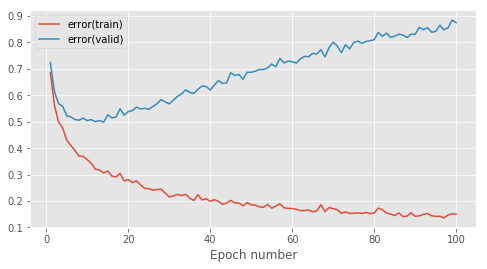

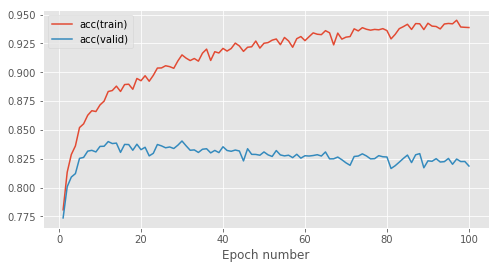

In [5]:
# adam weight decay constant
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRuleWithWeightDecay()
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_adamw_constant = sum_stats/run_times

adamw restarts, no restarts

Epoch 1: 3.3s to complete
    error(train)=6.59e-01, acc(train)=7.84e-01, error(valid)=6.86e-01, acc(valid)=7.77e-01


Epoch 2: 3.2s to complete
    error(train)=5.44e-01, acc(train)=8.21e-01, error(valid)=5.90e-01, acc(valid)=8.11e-01


Epoch 3: 3.2s to complete
    error(train)=4.84e-01, acc(train)=8.37e-01, error(valid)=5.48e-01, acc(valid)=8.21e-01


Epoch 4: 3.2s to complete
    error(train)=4.57e-01, acc(train)=8.44e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


Epoch 5: 3.2s to complete
    error(train)=4.29e-01, acc(train)=8.52e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 6: 3.5s to complete
    error(train)=4.13e-01, acc(train)=8.55e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 7: 3.5s to complete
    error(train)=3.90e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


Epoch 8: 4.2s to complete
    error(train)=3.64e-01, acc(train)=8.71e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


Epoch 9: 4.0s to complete
    error(train)=3.52e-01, acc(train)=8.75e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


Epoch 10: 3.9s to complete
    error(train)=3.44e-01, acc(train)=8.75e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 11: 3.8s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 12: 4.7s to complete
    error(train)=3.17e-01, acc(train)=8.84e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 13: 4.2s to complete
    error(train)=3.24e-01, acc(train)=8.81e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 14: 3.5s to complete
    error(train)=3.21e-01, acc(train)=8.81e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


Epoch 15: 3.6s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 16: 3.5s to complete
    error(train)=2.93e-01, acc(train)=8.89e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 17: 3.6s to complete
    error(train)=2.79e-01, acc(train)=8.95e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


Epoch 18: 3.5s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 19: 3.9s to complete
    error(train)=2.62e-01, acc(train)=9.00e-01, error(valid)=5.19e-01, acc(valid)=8.41e-01


Epoch 20: 4.5s to complete
    error(train)=2.68e-01, acc(train)=8.98e-01, error(valid)=5.41e-01, acc(valid)=8.37e-01


Epoch 21: 4.6s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=5.26e-01, acc(valid)=8.38e-01


Epoch 22: 4.4s to complete
    error(train)=2.46e-01, acc(train)=9.05e-01, error(valid)=5.26e-01, acc(valid)=8.40e-01


Epoch 23: 3.5s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.66e-01, acc(valid)=8.30e-01


Epoch 24: 3.5s to complete
    error(train)=2.29e-01, acc(train)=9.12e-01, error(valid)=5.36e-01, acc(valid)=8.40e-01


Epoch 25: 3.6s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=5.51e-01, acc(valid)=8.36e-01


Epoch 26: 3.6s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=5.62e-01, acc(valid)=8.31e-01


Epoch 27: 3.6s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01


Epoch 28: 3.6s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=5.70e-01, acc(valid)=8.36e-01


Epoch 29: 3.5s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=5.87e-01, acc(valid)=8.37e-01


Epoch 30: 3.6s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=5.96e-01, acc(valid)=8.30e-01


Epoch 31: 4.0s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=5.87e-01, acc(valid)=8.36e-01


Epoch 32: 4.1s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=5.99e-01, acc(valid)=8.33e-01


Epoch 33: 4.7s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=6.09e-01, acc(valid)=8.32e-01


Epoch 34: 5.1s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=6.10e-01, acc(valid)=8.34e-01


Epoch 35: 4.2s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=6.20e-01, acc(valid)=8.32e-01


Epoch 36: 3.5s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=6.17e-01, acc(valid)=8.36e-01


Epoch 37: 3.6s to complete
    error(train)=2.04e-01, acc(train)=9.16e-01, error(valid)=6.33e-01, acc(valid)=8.29e-01


Epoch 38: 4.2s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=6.18e-01, acc(valid)=8.34e-01


Epoch 39: 4.9s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=6.41e-01, acc(valid)=8.35e-01


Epoch 40: 4.9s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.33e-01, acc(valid)=8.32e-01


Epoch 41: 5.3s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.58e-01, acc(valid)=8.34e-01


Epoch 42: 5.3s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=6.58e-01, acc(valid)=8.32e-01


Epoch 43: 4.2s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=6.59e-01, acc(valid)=8.35e-01


Epoch 44: 3.6s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=6.84e-01, acc(valid)=8.29e-01


Epoch 45: 3.5s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=6.65e-01, acc(valid)=8.33e-01


Epoch 46: 5.2s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=6.71e-01, acc(valid)=8.31e-01


Epoch 47: 6.4s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=6.82e-01, acc(valid)=8.34e-01


Epoch 48: 3.7s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=6.96e-01, acc(valid)=8.29e-01


Epoch 49: 3.9s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=6.93e-01, acc(valid)=8.32e-01


Epoch 50: 5.8s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.11e-01, acc(valid)=8.30e-01


Epoch 51: 3.7s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=7.17e-01, acc(valid)=8.27e-01


Epoch 52: 3.6s to complete
    error(train)=1.54e-01, acc(train)=9.39e-01, error(valid)=7.18e-01, acc(valid)=8.31e-01


Epoch 53: 3.6s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=7.28e-01, acc(valid)=8.29e-01


Epoch 54: 3.6s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=7.17e-01, acc(valid)=8.33e-01


Epoch 55: 3.6s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=7.41e-01, acc(valid)=8.27e-01


Epoch 56: 3.8s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=7.42e-01, acc(valid)=8.29e-01


Epoch 57: 4.4s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=7.44e-01, acc(valid)=8.29e-01


Epoch 58: 4.5s to complete
    error(train)=1.35e-01, acc(train)=9.47e-01, error(valid)=7.42e-01, acc(valid)=8.30e-01


Epoch 59: 4.1s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=7.41e-01, acc(valid)=8.28e-01


Epoch 60: 3.9s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=7.61e-01, acc(valid)=8.30e-01


Epoch 61: 3.9s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=7.61e-01, acc(valid)=8.25e-01


Epoch 62: 3.9s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=7.72e-01, acc(valid)=8.29e-01


Epoch 63: 3.6s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=7.61e-01, acc(valid)=8.33e-01


Epoch 64: 3.6s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=7.57e-01, acc(valid)=8.28e-01


Epoch 65: 3.7s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=7.95e-01, acc(valid)=8.28e-01


Epoch 66: 3.5s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=8.03e-01, acc(valid)=8.23e-01


Epoch 67: 3.5s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=7.98e-01, acc(valid)=8.28e-01


Epoch 68: 3.5s to complete
    error(train)=1.19e-01, acc(train)=9.53e-01, error(valid)=7.94e-01, acc(valid)=8.28e-01


Epoch 69: 3.5s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=8.00e-01, acc(valid)=8.29e-01


Epoch 70: 3.6s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=8.22e-01, acc(valid)=8.29e-01


Epoch 71: 4.0s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=8.39e-01, acc(valid)=8.28e-01


Epoch 72: 4.0s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=8.34e-01, acc(valid)=8.28e-01


Epoch 73: 3.6s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=8.29e-01, acc(valid)=8.24e-01


Epoch 74: 4.1s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=8.37e-01, acc(valid)=8.25e-01


Epoch 75: 3.7s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=8.36e-01, acc(valid)=8.31e-01


Epoch 76: 3.6s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=8.43e-01, acc(valid)=8.29e-01


Epoch 77: 3.6s to complete
    error(train)=1.04e-01, acc(train)=9.60e-01, error(valid)=8.53e-01, acc(valid)=8.25e-01


Epoch 78: 3.8s to complete
    error(train)=1.07e-01, acc(train)=9.59e-01, error(valid)=8.56e-01, acc(valid)=8.28e-01


Epoch 79: 3.9s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=8.63e-01, acc(valid)=8.29e-01


Epoch 80: 4.7s to complete
    error(train)=9.64e-02, acc(train)=9.63e-01, error(valid)=8.59e-01, acc(valid)=8.28e-01


Epoch 81: 4.1s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=8.66e-01, acc(valid)=8.27e-01


Epoch 82: 5.5s to complete
    error(train)=1.02e-01, acc(train)=9.61e-01, error(valid)=8.76e-01, acc(valid)=8.25e-01


Epoch 83: 3.7s to complete
    error(train)=9.56e-02, acc(train)=9.63e-01, error(valid)=8.91e-01, acc(valid)=8.25e-01


Epoch 84: 3.6s to complete
    error(train)=9.37e-02, acc(train)=9.65e-01, error(valid)=8.81e-01, acc(valid)=8.27e-01


Epoch 85: 5.0s to complete
    error(train)=9.19e-02, acc(train)=9.65e-01, error(valid)=8.81e-01, acc(valid)=8.28e-01


Epoch 86: 3.6s to complete
    error(train)=9.42e-02, acc(train)=9.65e-01, error(valid)=9.04e-01, acc(valid)=8.24e-01


Epoch 87: 3.6s to complete
    error(train)=8.86e-02, acc(train)=9.67e-01, error(valid)=8.93e-01, acc(valid)=8.26e-01


Epoch 88: 3.6s to complete
    error(train)=8.68e-02, acc(train)=9.68e-01, error(valid)=8.87e-01, acc(valid)=8.29e-01


Epoch 89: 4.2s to complete
    error(train)=8.77e-02, acc(train)=9.67e-01, error(valid)=9.06e-01, acc(valid)=8.27e-01


Epoch 90: 4.2s to complete
    error(train)=8.48e-02, acc(train)=9.68e-01, error(valid)=9.11e-01, acc(valid)=8.25e-01


Epoch 91: 3.7s to complete
    error(train)=8.24e-02, acc(train)=9.70e-01, error(valid)=9.11e-01, acc(valid)=8.27e-01


Epoch 92: 4.1s to complete
    error(train)=8.33e-02, acc(train)=9.69e-01, error(valid)=9.24e-01, acc(valid)=8.26e-01


Epoch 93: 4.5s to complete
    error(train)=8.15e-02, acc(train)=9.70e-01, error(valid)=9.14e-01, acc(valid)=8.27e-01


Epoch 94: 5.3s to complete
    error(train)=8.04e-02, acc(train)=9.70e-01, error(valid)=9.30e-01, acc(valid)=8.28e-01


Epoch 95: 3.6s to complete
    error(train)=7.85e-02, acc(train)=9.71e-01, error(valid)=9.32e-01, acc(valid)=8.28e-01


Epoch 96: 3.5s to complete
    error(train)=7.50e-02, acc(train)=9.73e-01, error(valid)=9.16e-01, acc(valid)=8.26e-01


Epoch 97: 3.8s to complete
    error(train)=7.81e-02, acc(train)=9.72e-01, error(valid)=9.39e-01, acc(valid)=8.24e-01


Epoch 98: 3.8s to complete
    error(train)=8.04e-02, acc(train)=9.69e-01, error(valid)=9.46e-01, acc(valid)=8.25e-01


Epoch 99: 4.0s to complete
    error(train)=7.56e-02, acc(train)=9.72e-01, error(valid)=9.40e-01, acc(valid)=8.26e-01


Epoch 100: 3.9s to complete
    error(train)=7.13e-02, acc(train)=9.74e-01, error(valid)=9.41e-01, acc(valid)=8.27e-01


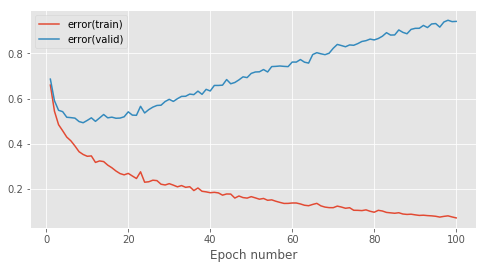

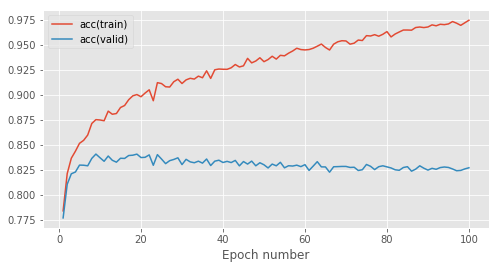

In [6]:
# adam weight decay no restarts
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRuleWithWeightDecay()
min_learning_rate = 1e-4
max_learning_rate = 1e-3
total_iters_per_period = 200
max_learning_rate_discount_factor = 1
period_iteration_expansion_factor = 1
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_adamw_no_restarts = sum_stats/run_times

Epoch 1: 3.3s to complete
    error(train)=6.44e-01, acc(train)=7.93e-01, error(valid)=6.77e-01, acc(valid)=7.85e-01


Epoch 2: 4.4s to complete
    error(train)=5.36e-01, acc(train)=8.23e-01, error(valid)=5.85e-01, acc(valid)=8.07e-01


Epoch 3: 3.6s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


Epoch 4: 4.3s to complete
    error(train)=4.54e-01, acc(train)=8.44e-01, error(valid)=5.39e-01, acc(valid)=8.22e-01


Epoch 5: 4.8s to complete
    error(train)=4.18e-01, acc(train)=8.54e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


Epoch 6: 4.3s to complete
    error(train)=3.96e-01, acc(train)=8.61e-01, error(valid)=4.99e-01, acc(valid)=8.32e-01


Epoch 7: 4.4s to complete
    error(train)=3.74e-01, acc(train)=8.67e-01, error(valid)=4.89e-01, acc(valid)=8.37e-01


Epoch 8: 4.8s to complete
    error(train)=3.67e-01, acc(train)=8.66e-01, error(valid)=4.96e-01, acc(valid)=8.33e-01


Epoch 9: 3.9s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


Epoch 10: 3.7s to complete
    error(train)=3.30e-01, acc(train)=8.82e-01, error(valid)=4.74e-01, acc(valid)=8.38e-01


Epoch 11: 3.9s to complete
    error(train)=3.12e-01, acc(train)=8.89e-01, error(valid)=4.71e-01, acc(valid)=8.46e-01


Epoch 12: 3.8s to complete
    error(train)=3.02e-01, acc(train)=8.93e-01, error(valid)=4.65e-01, acc(valid)=8.49e-01


Epoch 13: 3.7s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=4.62e-01, acc(valid)=8.49e-01


Epoch 14: 4.5s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=4.62e-01, acc(valid)=8.50e-01


Epoch 15: 5.5s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=4.65e-01, acc(valid)=8.49e-01


Epoch 16: 3.9s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.62e-01, acc(valid)=8.50e-01


Epoch 17: 4.7s to complete
    error(train)=2.74e-01, acc(train)=9.03e-01, error(valid)=4.60e-01, acc(valid)=8.50e-01


Epoch 18: 4.3s to complete
    error(train)=2.70e-01, acc(train)=9.05e-01, error(valid)=4.58e-01, acc(valid)=8.53e-01


Epoch 19: 3.7s to complete
    error(train)=2.67e-01, acc(train)=9.06e-01, error(valid)=4.55e-01, acc(valid)=8.54e-01


Epoch 20: 3.9s to complete
    error(train)=2.66e-01, acc(train)=9.06e-01, error(valid)=4.56e-01, acc(valid)=8.53e-01


Epoch 21: 3.6s to complete
    error(train)=2.66e-01, acc(train)=9.07e-01, error(valid)=4.54e-01, acc(valid)=8.54e-01


Epoch 22: 3.5s to complete
    error(train)=2.65e-01, acc(train)=9.07e-01, error(valid)=4.55e-01, acc(valid)=8.53e-01


Epoch 23: 3.7s to complete
    error(train)=2.65e-01, acc(train)=9.07e-01, error(valid)=4.54e-01, acc(valid)=8.54e-01


Epoch 24: 4.7s to complete
    error(train)=2.65e-01, acc(train)=9.07e-01, error(valid)=4.54e-01, acc(valid)=8.54e-01


Epoch 25: 3.8s to complete
    error(train)=3.22e-01, acc(train)=8.81e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


Epoch 26: 4.4s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


Epoch 27: 4.0s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 28: 4.2s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 29: 3.6s to complete
    error(train)=2.95e-01, acc(train)=8.91e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 30: 4.0s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=4.95e-01, acc(valid)=8.43e-01


Epoch 31: 3.5s to complete
    error(train)=2.77e-01, acc(train)=8.95e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 32: 3.5s to complete
    error(train)=2.77e-01, acc(train)=8.96e-01, error(valid)=5.22e-01, acc(valid)=8.40e-01


Epoch 33: 4.9s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=5.27e-01, acc(valid)=8.38e-01


Epoch 34: 3.9s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.24e-01, acc(valid)=8.35e-01


Epoch 35: 4.1s to complete
    error(train)=2.47e-01, acc(train)=9.08e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


Epoch 36: 6.6s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=5.29e-01, acc(valid)=8.37e-01


Epoch 37: 3.9s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=5.40e-01, acc(valid)=8.37e-01


Epoch 38: 6.2s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.47e-01, acc(valid)=8.40e-01


Epoch 39: 4.2s to complete
    error(train)=2.28e-01, acc(train)=9.13e-01, error(valid)=5.43e-01, acc(valid)=8.39e-01


Epoch 40: 4.0s to complete
    error(train)=2.24e-01, acc(train)=9.16e-01, error(valid)=5.44e-01, acc(valid)=8.35e-01


Epoch 41: 4.8s to complete
    error(train)=2.17e-01, acc(train)=9.17e-01, error(valid)=5.45e-01, acc(valid)=8.41e-01


Epoch 42: 4.1s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=5.58e-01, acc(valid)=8.40e-01


Epoch 43: 4.4s to complete
    error(train)=2.07e-01, acc(train)=9.20e-01, error(valid)=5.53e-01, acc(valid)=8.38e-01


Epoch 44: 6.1s to complete
    error(train)=2.02e-01, acc(train)=9.23e-01, error(valid)=5.67e-01, acc(valid)=8.39e-01


Epoch 45: 3.8s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=5.66e-01, acc(valid)=8.38e-01


Epoch 46: 3.6s to complete
    error(train)=1.95e-01, acc(train)=9.26e-01, error(valid)=5.79e-01, acc(valid)=8.38e-01


Epoch 47: 4.8s to complete
    error(train)=1.89e-01, acc(train)=9.28e-01, error(valid)=5.73e-01, acc(valid)=8.38e-01


Epoch 48: 5.2s to complete
    error(train)=1.85e-01, acc(train)=9.29e-01, error(valid)=5.79e-01, acc(valid)=8.37e-01


Epoch 49: 3.9s to complete
    error(train)=1.82e-01, acc(train)=9.29e-01, error(valid)=5.91e-01, acc(valid)=8.38e-01


Epoch 50: 4.2s to complete
    error(train)=1.82e-01, acc(train)=9.30e-01, error(valid)=6.09e-01, acc(valid)=8.36e-01


Epoch 51: 3.5s to complete
    error(train)=1.78e-01, acc(train)=9.32e-01, error(valid)=6.06e-01, acc(valid)=8.36e-01


Epoch 52: 3.4s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=5.98e-01, acc(valid)=8.37e-01


Epoch 53: 3.4s to complete
    error(train)=1.65e-01, acc(train)=9.38e-01, error(valid)=6.11e-01, acc(valid)=8.37e-01


Epoch 54: 3.4s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=6.14e-01, acc(valid)=8.35e-01


Epoch 55: 3.5s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=6.11e-01, acc(valid)=8.38e-01


Epoch 56: 3.4s to complete
    error(train)=1.55e-01, acc(train)=9.41e-01, error(valid)=6.28e-01, acc(valid)=8.37e-01


Epoch 57: 3.4s to complete
    error(train)=1.46e-01, acc(train)=9.46e-01, error(valid)=6.24e-01, acc(valid)=8.39e-01


Epoch 58: 4.0s to complete
    error(train)=1.49e-01, acc(train)=9.44e-01, error(valid)=6.29e-01, acc(valid)=8.39e-01


Epoch 59: 3.6s to complete
    error(train)=1.45e-01, acc(train)=9.46e-01, error(valid)=6.37e-01, acc(valid)=8.37e-01


Epoch 60: 3.6s to complete
    error(train)=1.46e-01, acc(train)=9.44e-01, error(valid)=6.45e-01, acc(valid)=8.38e-01


Epoch 61: 4.3s to complete
    error(train)=1.42e-01, acc(train)=9.48e-01, error(valid)=6.47e-01, acc(valid)=8.37e-01


Epoch 62: 3.5s to complete
    error(train)=1.40e-01, acc(train)=9.49e-01, error(valid)=6.49e-01, acc(valid)=8.37e-01


Epoch 63: 3.5s to complete
    error(train)=1.36e-01, acc(train)=9.51e-01, error(valid)=6.50e-01, acc(valid)=8.36e-01


Epoch 64: 3.5s to complete
    error(train)=1.33e-01, acc(train)=9.51e-01, error(valid)=6.62e-01, acc(valid)=8.36e-01


Epoch 65: 3.4s to complete
    error(train)=1.33e-01, acc(train)=9.51e-01, error(valid)=6.60e-01, acc(valid)=8.34e-01


Epoch 66: 3.4s to complete
    error(train)=1.30e-01, acc(train)=9.53e-01, error(valid)=6.62e-01, acc(valid)=8.36e-01


Epoch 67: 3.4s to complete
    error(train)=1.26e-01, acc(train)=9.55e-01, error(valid)=6.62e-01, acc(valid)=8.38e-01


Epoch 68: 3.5s to complete
    error(train)=1.25e-01, acc(train)=9.56e-01, error(valid)=6.65e-01, acc(valid)=8.38e-01


Epoch 69: 3.5s to complete
    error(train)=1.24e-01, acc(train)=9.57e-01, error(valid)=6.67e-01, acc(valid)=8.36e-01


Epoch 70: 3.5s to complete
    error(train)=1.23e-01, acc(train)=9.56e-01, error(valid)=6.69e-01, acc(valid)=8.36e-01


Epoch 71: 3.4s to complete
    error(train)=1.20e-01, acc(train)=9.59e-01, error(valid)=6.71e-01, acc(valid)=8.37e-01


Epoch 72: 4.4s to complete
    error(train)=1.19e-01, acc(train)=9.59e-01, error(valid)=6.72e-01, acc(valid)=8.37e-01


Epoch 73: 3.5s to complete
    error(train)=1.19e-01, acc(train)=9.58e-01, error(valid)=6.74e-01, acc(valid)=8.38e-01


Epoch 74: 4.5s to complete
    error(train)=1.17e-01, acc(train)=9.59e-01, error(valid)=6.74e-01, acc(valid)=8.37e-01


Epoch 75: 3.7s to complete
    error(train)=1.17e-01, acc(train)=9.58e-01, error(valid)=6.78e-01, acc(valid)=8.38e-01


Epoch 76: 3.5s to complete
    error(train)=1.17e-01, acc(train)=9.59e-01, error(valid)=6.76e-01, acc(valid)=8.37e-01


Epoch 77: 3.5s to complete
    error(train)=1.15e-01, acc(train)=9.60e-01, error(valid)=6.78e-01, acc(valid)=8.38e-01


Epoch 78: 3.8s to complete
    error(train)=1.15e-01, acc(train)=9.61e-01, error(valid)=6.81e-01, acc(valid)=8.37e-01


Epoch 79: 3.5s to complete
    error(train)=1.14e-01, acc(train)=9.61e-01, error(valid)=6.78e-01, acc(valid)=8.38e-01


Epoch 80: 3.8s to complete
    error(train)=1.13e-01, acc(train)=9.61e-01, error(valid)=6.77e-01, acc(valid)=8.36e-01


Epoch 81: 3.5s to complete
    error(train)=1.13e-01, acc(train)=9.62e-01, error(valid)=6.76e-01, acc(valid)=8.37e-01


Epoch 82: 4.4s to complete
    error(train)=1.13e-01, acc(train)=9.62e-01, error(valid)=6.79e-01, acc(valid)=8.37e-01


Epoch 83: 4.5s to complete
    error(train)=1.13e-01, acc(train)=9.62e-01, error(valid)=6.76e-01, acc(valid)=8.36e-01


Epoch 84: 4.6s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.77e-01, acc(valid)=8.36e-01


Epoch 85: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.77e-01, acc(valid)=8.37e-01


Epoch 86: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.75e-01, acc(valid)=8.36e-01


Epoch 87: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.74e-01, acc(valid)=8.36e-01


Epoch 88: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.73e-01, acc(valid)=8.36e-01


Epoch 89: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.73e-01, acc(valid)=8.36e-01


Epoch 90: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.72e-01, acc(valid)=8.36e-01


Epoch 91: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.71e-01, acc(valid)=8.36e-01


Epoch 92: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.70e-01, acc(valid)=8.36e-01


Epoch 93: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.62e-01, error(valid)=6.70e-01, acc(valid)=8.36e-01


Epoch 94: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.69e-01, acc(valid)=8.36e-01


Epoch 95: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.68e-01, acc(valid)=8.36e-01


Epoch 96: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.67e-01, acc(valid)=8.36e-01


Epoch 97: 3.6s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.66e-01, acc(valid)=8.36e-01


Epoch 98: 3.5s to complete
    error(train)=1.12e-01, acc(train)=9.63e-01, error(valid)=6.65e-01, acc(valid)=8.36e-01


Epoch 99: 3.8s to complete
    error(train)=1.13e-01, acc(train)=9.63e-01, error(valid)=6.65e-01, acc(valid)=8.36e-01


Epoch 100: 3.6s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=6.80e-01, acc(valid)=8.31e-01


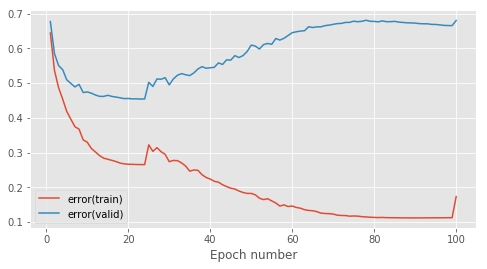

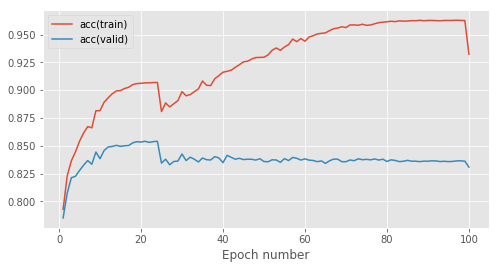

In [7]:
# adam weight decay restarts
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRuleWithWeightDecay()
min_learning_rate = 1e-4
max_learning_rate = 1e-3
total_iters_per_period = 25
max_learning_rate_discount_factor = 0.9
period_iteration_expansion_factor = 3
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_adamw_restarts = sum_stats/run_times

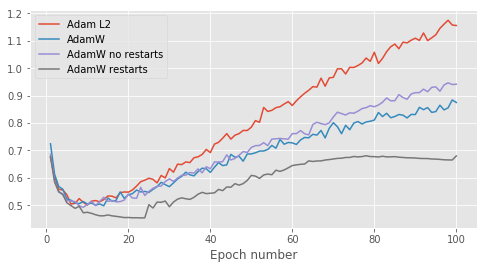

In [11]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_adaml2_constant.shape[0]) * stats_interval, stats_adaml2_constant[1:, keys['error(valid)']], label='Adam L2')
ax.plot(np.arange(1, stats_adamw_constant.shape[0]) * stats_interval, stats_adamw_constant[1:, keys['error(valid)']], label='AdamW')
ax.plot(np.arange(1, stats_adamw_no_restarts.shape[0]) * stats_interval, stats_adamw_no_restarts[1:, keys['error(valid)']], label='AdamW no restarts')
ax.plot(np.arange(1, stats_adamw_restarts.shape[0]) * stats_interval, stats_adamw_restarts[1:, keys['error(valid)']], label='AdamW restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task4/fig_val_error.pdf')

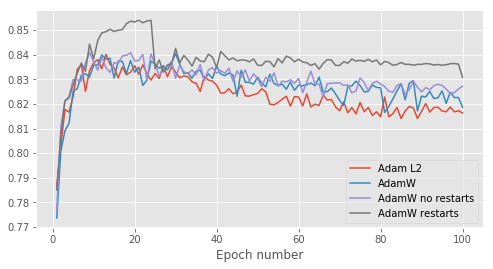

In [12]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_adaml2_constant.shape[0]) * stats_interval, stats_adaml2_constant[1:, keys['acc(valid)']], label='Adam L2')
ax.plot(np.arange(1, stats_adamw_constant.shape[0]) * stats_interval, stats_adamw_constant[1:, keys['acc(valid)']], label='AdamW')
ax.plot(np.arange(1, stats_adamw_no_restarts.shape[0]) * stats_interval, stats_adamw_no_restarts[1:, keys['acc(valid)']], label='AdamW no restarts')
ax.plot(np.arange(1, stats_adamw_restarts.shape[0]) * stats_interval, stats_adamw_restarts[1:, keys['acc(valid)']], label='AdamW restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task4/fig_val_acc.pdf')